In [3]:
%pip install pandas 


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
seeds_df = pd.read_csv("../arquivosCsv/seeds.csv", header=None)
seeds_df.head(5)

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [7]:
seeds_df.to_numpy()

array([[15.26  , 14.84  ,  0.871 , ...,  2.221 ,  5.22  ,  1.    ],
       [14.88  , 14.57  ,  0.8811, ...,  1.018 ,  4.956 ,  1.    ],
       [14.29  , 14.09  ,  0.905 , ...,  2.699 ,  4.825 ,  1.    ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  8.315 ,  5.056 ,  3.    ],
       [11.84  , 13.21  ,  0.8521, ...,  3.598 ,  5.044 ,  3.    ],
       [12.3   , 13.34  ,  0.8684, ...,  5.637 ,  5.063 ,  3.    ]],
      shape=(210, 8))

In [8]:
from sklearn.decomposition import PCA

In [22]:
X = seeds_df.to_numpy()
pca = PCA(n_components=2)
components = pca.fit_transform(X)
components


array([[ 0.76592401, -1.63823958],
       [ 0.42823704, -2.85745423],
       [-0.55342906, -1.42163614],
       [-0.94321347, -1.89897174],
       [ 1.7232104 , -2.33066628],
       [-0.36950379, -1.60689512],
       [-0.08668926, -0.47070657],
       [-0.67319621, -1.42153194],
       [ 2.37629964, -1.51804185],
       [ 2.0753079 , -1.66122712],
       [ 0.45790153,  0.5314948 ],
       [-0.5975957 , -2.34232666],
       [-1.11206315, -0.28184644],
       [-1.06233792, -1.0703638 ],
       [-1.08447338, -1.27052737],
       [-0.41157314,  0.01093499],
       [-1.280224  ,  0.87278901],
       [ 1.16206693, -2.19386082],
       [-0.04024653, -2.24891461],
       [-2.35508906, -0.34372961],
       [-0.52748368, -1.02335052],
       [-0.58302553, -1.39765455],
       [ 1.51597435, -2.92849787],
       [-2.71585335, -2.95026167],
       [ 0.54001443, -2.09571227],
       [ 1.91775685, -2.71508068],
       [-1.91153285, -0.97403874],
       [-2.07942038, -1.82071968],
       [-0.63769059,

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(components, test_size=0.3,
                                                    random_state=42)
X_train

array([[ 6.15159099, -0.71964467],
       [ 2.60604265, -0.38844345],
       [-3.12064491, -0.24343336],
       [-3.40937739, -0.30009201],
       [ 0.85538636, -0.49264326],
       [-1.11206315, -0.28184644],
       [ 1.61945387, -1.45346356],
       [-0.63769059, -1.3580061 ],
       [-1.76783505, -1.83284034],
       [ 4.88981227, -0.58937445],
       [ 3.92399934, -0.14670378],
       [-3.23828293,  1.51648652],
       [ 0.79238405,  1.56108236],
       [ 4.42460758,  0.64385299],
       [-4.61268303,  2.51937423],
       [ 2.82606785,  0.5850392 ],
       [-1.25025623, -1.92181877],
       [-3.19881742,  4.34237664],
       [ 4.4442544 ,  2.04004126],
       [ 1.15205688, -0.2059844 ],
       [-1.91153285, -0.97403874],
       [-2.17605659,  1.53694045],
       [-4.10630174,  1.76057749],
       [ 1.47638091,  0.80199848],
       [-0.55342906, -1.42163614],
       [ 6.42164839,  1.75724769],
       [ 0.9263447 , -2.43670711],
       [ 3.61252093, -0.79753343],
       [ 4.87513634,

In [11]:
from sklearn.cluster import KMeans

In [12]:
model = KMeans(n_clusters=4)

In [13]:
model.fit(X_train)

c:\Program Files\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Program Files\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Program Files\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~

KMeans(n_clusters=4)

In [14]:
labels = model.predict(X_train)
labels

array([1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 3, 2, 1, 3, 1, 0, 3, 1, 2, 0, 3,
       3, 2, 2, 1, 2, 1, 1, 1, 1, 3, 2, 1, 0, 2, 2, 1, 2, 2, 3, 0, 2, 0,
       3, 0, 3, 2, 2, 1, 3, 1, 3, 1, 2, 0, 0, 0, 3, 2, 3, 3, 1, 3, 0, 2,
       2, 0, 1, 0, 3, 3, 1, 3, 3, 2, 1, 3, 2, 3, 0, 1, 2, 2, 3, 3, 3, 2,
       1, 2, 2, 1, 1, 1, 3, 3, 1, 2, 0, 0, 3, 1, 2, 3, 1, 3, 2, 3, 3, 0,
       2, 1, 2, 3, 3, 3, 2, 2, 1, 2, 2, 0, 3, 1, 2, 3, 0, 2, 2, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 1, 0, 1, 0, 1], dtype=int32)

In [15]:
new_labels = model.predict(X_test)

In [16]:
print(new_labels)

[0 3 1 0 0 3 0 3 2 3 1 3 3 1 2 1 0 2 3 1 1 2 3 1 1 3 2 1 3 3 0 0 1 2 1 2 3
 1 1 3 3 3 3 1 3 2 0 1 2 2 2 3 1 0 0 2 2 2 0 2 0 2 1]


In [17]:
import matplotlib.pyplot as plt

In [18]:
x = X_train[:, 0]  # sepal length
y = X_train[:, 1]  # petal length

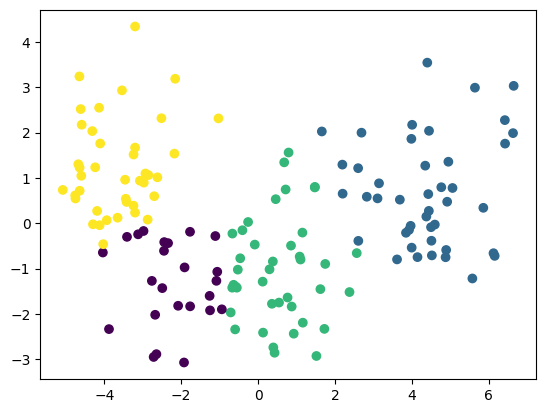

In [19]:
plt.scatter(x, y, c=labels)
plt.show()